In [1]:
import pandas as pd
import numpy as np
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
import seaborn as sns
import pymc as pm
import math
from scipy.optimize import fmin
import scipy.special as sp

%matplotlib inline

Optimization terminated successfully.
         Current function value: 0.109920
         Iterations: 33
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: 0.109920
         Iterations: 33
         Function evaluations: 62
mu: 2.14957144747 sig: 0.338081263539


Text(0.5,1,'Psychophysical curve')

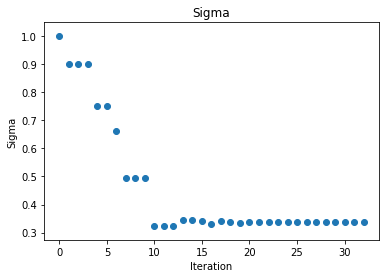

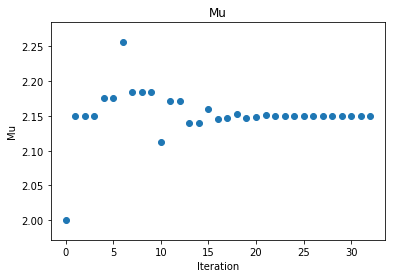

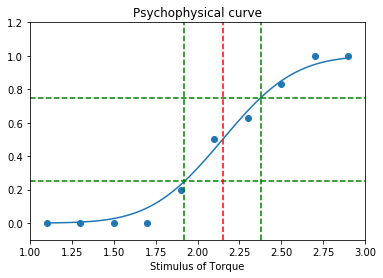

In [10]:
#Psychophysical curve using by a cumulative Gaussian distribution
#cited by http://kaji-lab.jp/kajimoto/ConstantMethodFitting.htm (in Japanese)

##Error function
def err(x,cs,p,w):
    sigma,mu = x
    a = p - 0.5 - 0.5 * sp.erf((cs-(mu))/(math.sqrt(2)*sigma))
    return sum(w*(a**2))


###Coefficients
cs = np.array([1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9]) #Comparison stimulus
frc = np.array([0,0,0,0,0.2,0.5,0.63,0.83,1,1]) #Fraction of "Larger comparison stimulus"
w = np.array([1,1,1,3,10,14,11,6,2,1]) #Number of times the subjects answer the comparison stimulus
        
#Weighted least square method
sig, mu = fmin(err, np.array([1,cs.mean()]),args=(cs,frc,w))
        
###Extracting the value of optimization process
###I use just allvecs...
[xopt, fopt, iter, funcalls, warnflag, allvecs] = fmin(err, np.array([1,cs.mean()]),args=(cs,frc,w), retall=True, full_output=True)
        
##Checking the convergence plot
plt.figure()
plt.scatter(np.arange(len(allvecs)), [row[0] for row in allvecs])
plt.xlabel("Iteration")
plt.ylabel("Sigma")
plt.title("Sigma")
plt.figure()
plt.scatter(np.arange(len(allvecs)), [row[1] for row in allvecs])
plt.xlabel("Iteration")
plt.ylabel("Mu")
plt.title("Mu")

cs2 = np.linspace(min(cs), max(cs),100)
p2 = 0.5 + 0.5 * sp.erf((cs2 - (mu)) / (math.sqrt(2)*sig))
        
bound025 = sp.erfinv(0.25*2-1) * math.sqrt(2) * sig + (mu)
bound075 = sp.erfinv(0.75*2-1) * math.sqrt(2) * sig + (mu)        
print("mu:",mu,"sig:",sig)
        
##Figure
##Plotting the experimental value
plt.figure()
plt.scatter(cs, frc)
        
##Plotting the psychophysical curve
plt.plot(cs2,p2)
        
##25%,75% thresholds
plt.plot([1.0,3.1], [0.25,0.25], linestyle = 'dashed',color="green")
plt.plot([1.0,3.1], [0.75,0.75], linestyle = 'dashed',color="green")
plt.plot([bound025,bound025], [-0.1,1.2], linestyle = 'dashed',color="green")#25% threshold
plt.plot([bound075,bound075], [-0.1,1.2], linestyle = 'dashed',color="green")#75% threshold
        
##PSE
plt.plot([mu,mu], [-0.1,1.2], linestyle = 'dashed',color="red")#PSE
        
plt.xlabel("Stimulus of Torque")
plt.xlim(1.0,3.0)
plt.ylim(-0.1,1.2)
plt.title("Psychophysical curve")